# Kelvin waves

Here we filter out Kelvin waves using dynamical variables at 850 hPa, and compare them between the models. We use a spatial projection method ([Yang et al., 2003](https://doi.org/10.1175/1520-0469(2003)060<1637:CCEWAN>2.0.CO;2)). As the core function of the spatial projectio was provided by Uni Reading, the filtering script is provided separately.

1. Download the filtering script.
2. Make `spatial-projection.sh` executable

In [1]:
!chmod u+x spatial-projection.sh

3. Excute the bash script

In [2]:
!./spatial-projection.sh

NetCDF4.9.0-intel-2021.4-impi-2021.4 is unloaded 
Lmod has detected the following error:  The following module(s) are
unknown: "compiler/intel/17.0"

Please check the spelling or version number. Also try "module spider ..."
It is also possible your cache file is out-of-date; it may help to try:
  $ module --ignore_cache load "compiler/intel/17.0"

Also make sure that all modulefiles written in TCL start with the string
#%Module



NetCDF 4.9.0-intel-2021.4-impi-2021.4 is loaded. Available are netcdf-c-4.9.0,
netcdf-cxx4-4.3.1, netcdf-fortran-4.5.4 
/home/kit/imktro/lf2236/.bash_profile: line 8: /home/kit/imktro/lf2236:/.bashrc: No such file or directory
NetCDF4.9.0-intel-2021.4-impi-2021.4 is unloaded 
identifying Kelvin ...
identifying Kelvin ...
identifying Kelvin ...
identifying Kelvin ...
identifying Kelvin ...
identifying Kelvin ...
identifying Kelvin ...
identifying Kelvin ...


**Filtering is done!**

## 1. ERA5

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

ds = xr.open_dataset('data/era5/yang_Kelvin.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 1464, lat: 10, lon: 64)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -25.31 -19.69 -14.06 -8.437 ... 14.06 19.69 25.31
Data variables:
    u_wave   (time, lat, lon) float64 ...
    v_wave   (time, lat, lon) float64 ...
    z_wave   (time, lat, lon) float64 ...
Attributes:
    trapping scale:  6.0

`u_wave`, `v_wave` and `z_wave` are Kelvin-filtered zonal wind, meridional wind and geopotential height.

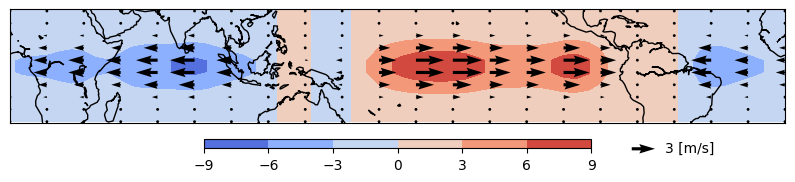

In [4]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(10,4))
map = Basemap(projection='cyl',llcrnrlat= -26,urcrnrlat=26,
              resolution='c',  llcrnrlon=ds.lon[0],urcrnrlon=ds.lon[-1])

map.drawcoastlines()
xx, yy = map(*np.meshgrid(ds.lon,ds.lat))

im = map.contourf(xx, yy, ds['z_wave'][10, ...], levels=np.linspace(-9,9,7), cmap='coolwarm')
q = plt.quiver(xx[:, ::3], yy[:, ::3], ds['u_wave'][10, :, ::3], ds['v_wave'][10,:, ::3], scale=100)
plt.quiverkey(q, 0.77, 0.2, 3, '3 [m/s]', labelpos='E', coordinates='figure')
plt.colorbar(im, shrink = 0.5, orientation='horizontal', pad=0.05, aspect=40)

The plot above shows the Kelvin-filtered geopotential height and winds at 850 hPa. Note that Kelvin waves have no meridional component and that the amplitude of the waves is the largest at the equator. How does it look like compared to a spatial pattern of Kelvin waves derived from the shallow water equations?

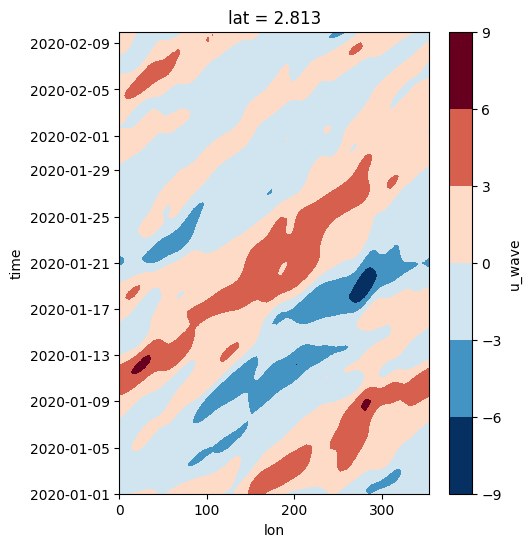

In [5]:
fig = plt.figure( figsize=(5,6) )

ds['u_wave'].sel(lat = 2, method='nearest').sel(time = slice(np.datetime64('2020-01-01T00'), np.datetime64('2020-02-10T00'))).plot.contourf()

This is a hovmöller diagram of Kelvin-filtered zonal wind at 850 hPa. Since the spatial projection method emphasizes a horizontal structure of a wave, the zonal wind at a certain latitude can represent the wave, i.e., no latitudinal average is needed. Kelvin waves have a maximum amplitude of zonal wind and geopotential at the equator. Here, I choose 2.8N as the data does not have a grid at 0.

## 2. Compare ERA5 with other forecast models

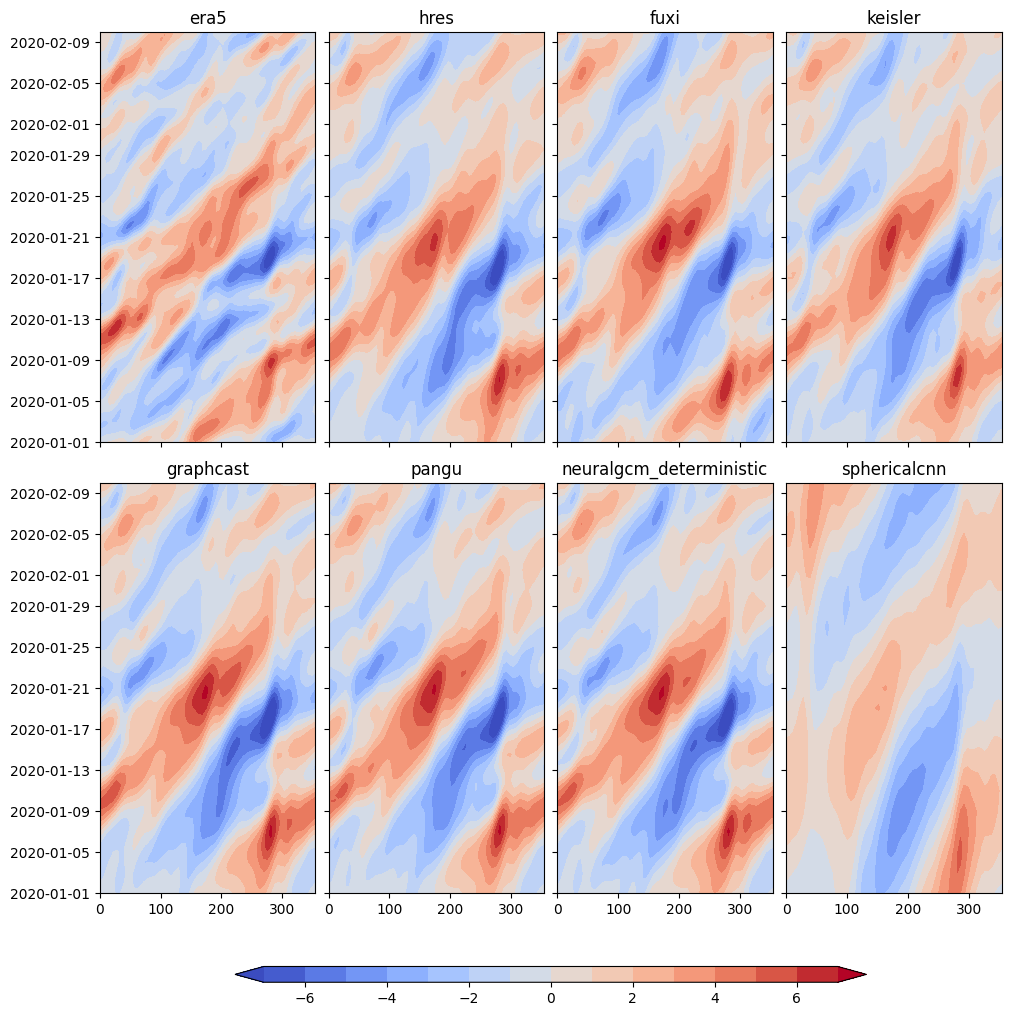

In [6]:
odirs=['era5', 'hres', 'fuxi', 'keisler', 'graphcast', 'pangu', 'neuralgcm_deterministic', 'sphericalcnn']

fig, axs = plt.subplots(2,4, figsize=(10,10), sharex=True, sharey=True, layout='constrained')

for ax, od in zip(axs.flat, odirs):
    ds = xr.open_dataset('data/%s/yang_Kelvin.nc' % od)

    var = ds['u_wave'].sel(lat=2, method='nearest')
    var = var.sel(time = slice(np.datetime64('2020-01-01T00'), np.datetime64('2020-02-10T00')))

    #select lead time except for era5
    if od != 'era5':
        var = var.sel(prediction_timedelta = np.timedelta64(1, 'D'))

    xx, yy = np.meshgrid(var.lon, var.time)
    im = ax.contourf(xx, yy, var, cmap='coolwarm', levels=np.linspace(-7,7,15), extend='both')
    ax.set_title(od)

plt.colorbar(im, ax=axs.ravel().tolist(), aspect=40, shrink=0.7, orientation='horizontal')

This illustrates Kelvin-filtered zonal wind at 850 hPa in ERA5 and forecast models with one-day lead time. For illustration purpose, I chose a period from Jan 1 to Feb 10, 2020. There are already many fascinating differences between the models and between era5 and models. I am going to leave further analysis to you. Some figures in [Yang et al., 2021](https://doi.org/10.1175/WAF-D-20-0144.1) can be inspirational.